In [1]:
%matplotlib inline

import matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

## Importing shapefile (.dbf file)

In [3]:
net_file_dbf = gpd.read_file('Data/Bounded_Net/DFW_combined_bounded.dbf')

In [4]:
net_file_dbf.head()     # Looking at first few entries

,ID,LENGTH,DIR,LNKNM,NET_ID,FAC_DIR,STREET,TRDIR,FUNCL,DIVID,...,TRXFER_EN,TSZ_EN,AREATY_EN,CYCLE__EN,STATIO_EN,lat_start,lat_end,lon_start,lon_end,geometry
0,83010,0.253878,0,40111900.0,83010.0,None,BETHEL SCHOOL RD,2,4,2,...,NaN,6152,3,NaN,None,-96.993407,-96.989151,32.960340,32.959946,"LINESTRING (-96.993407 32.96034, -96.993165 32..."
1,83047,0.466156,0,24489000.0,83047.0,None,BELT LINE RD,2,2,1,...,NaN,40236,3,NaN,None,-96.993442,-96.985800,32.947882,32.948939,"LINESTRING (-96.993442 32.947882, -96.992924 3..."
2,83244,0.371442,0,24142000.0,83244.0,None,BELT LINE RD,2,2,1,...,NaN,6432,3,69.0,None,-96.993630,-96.992707,32.911610,32.906324,"LINESTRING (-96.99363 32.91161, -96.993641 32...."
3,83258,1.069705,0,40174000.0,83258.0,None,CABELL DR,2,4,2,...,NaN,6539,2,NaN,None,-97.007904,-96.991041,32.907799,32.901603,"LINESTRING (-97.007904 32.907799, -97.007212 3..."
4,83394,0.821876,0,40183300.0,83394.0,None,CARBON RD,2,4,2,...,NaN,6640,2,NaN,None,-97.004264,-96.991460,32.877910,32.880251,"LINESTRING (-97.00426400000001 32.87791, -97.0..."


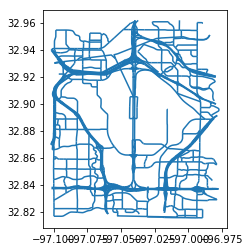

In [5]:
# Display network
net_file_dbf.plot()

## Selecting only useful column from file

In [6]:
list(net_file_dbf)

['ID',
 'LENGTH',
 'DIR',
 'LNKNM',
 'NET_ID',
 'FAC_DIR',
 'STREET',
 'TRDIR',
 'FUNCL',
 'DIVID',
 'CNTRLA',
 'CNTRLB',
 'USERLENGTH',
 'PKLNA',
 'OPLNA',
 'SPLTA',
 'PKLNB',
 'OPLNB',
 'SPLTB',
 'NHS',
 'FFCS',
 'FFCS_CLASS',
 'ON_SYSTEM',
 'TXDOT_DES',
 'NTTA',
 'MANAGED',
 'CAPACITY',
 'AMLN',
 'PMLN',
 'EXC_TRUCK',
 'STREETA',
 'STREETB',
 'DATE',
 'CODER',
 'REASON',
 'COMMENT',
 'YEAR',
 'INTVN',
 'CORRIDOR',
 'CONTROL',
 'C_SECTION',
 'COMB_C_S',
 'TOLL_LINK_',
 'AUX_LANES',
 'TOTAL_LANE',
 'THRULANES',
 'TOLLROAD',
 'TOLLA',
 'TOLLB',
 'TOLLA_AM',
 'TOLLA_PM',
 'TOLLA_OP',
 'TOLLB_AM',
 'TOLLB_PM',
 'TOLLB_OP',
 'TOLLMILE_A',
 'TOLLMILE_P',
 'TOLLMILE_O',
 'FUNCL_2',
 'TOLLMILE',
 'RSA_ID',
 'RSA_LINE1',
 'RSA_LINE2',
 'COMB_FSS',
 'TEMP_09211',
 'PKLN_AB',
 'PKLN_BA',
 'OPLN_AB',
 'OPLN_BA',
 'SPLT_AB',
 'SPLT_BA',
 'TOLLAM_AB',
 'TOLLAM_BA',
 'TOLLPM_AB',
 'TOLLPM_BA',
 'TOLLOP_AB',
 'TOLLOP_BA',
 'RTSTEMP',
 'LINKMODE',
 'A_PK',
 'B_PK',
 'C_PK',
 'A_OP',
 'B_OP',
 'C_OP',

In [7]:
mod_net_file_dbf = net_file_dbf[['ID','DIR','LENGTH','CNTRLA','CNTRLB','STREET','FUNCL','SPLTA','SPLTB','PKLNA','PKLNB','OPLNA','OPLNB','CNTRLA','CNTRLB','ID_ST', 'ID_EN','CAPACITY','geometry']]

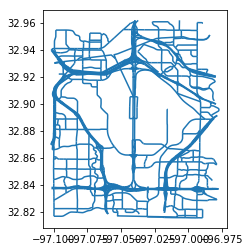

In [8]:
mod_net_file_dbf.plot()

In [9]:
mod_net_file_dbf.head()

,ID,DIR,LENGTH,CNTRLA,CNTRLB,STREET,FUNCL,SPLTA,SPLTB,PKLNA,PKLNB,OPLNA,OPLNB,CNTRLA,CNTRLB,ID_ST,ID_EN,CAPACITY,geometry
0,83010,0,0.253878,2,6,BETHEL SCHOOL RD,4,30,30,1,1,1,1,2,6,54942,54943,0,"LINESTRING (-96.993407 32.96034, -96.993165 32..."
1,83047,0,0.466156,2,1,BELT LINE RD,2,50,50,2,2,2,2,2,1,54944,54945,0,"LINESTRING (-96.993442 32.947882, -96.992924 3..."
2,83244,0,0.371442,2,2,BELT LINE RD,2,45,45,3,3,3,3,2,2,54946,54947,0,"LINESTRING (-96.99363 32.91161, -96.993641 32...."
3,83258,0,1.069705,1,7,CABELL DR,4,40,40,1,1,1,1,1,7,54948,54949,0,"LINESTRING (-97.007904 32.907799, -97.007212 3..."
4,83394,0,0.821876,7,7,CARBON RD,4,30,30,2,2,2,2,7,7,54950,54951,0,"LINESTRING (-97.00426400000001 32.87791, -97.0..."


## Modify Dir Column to contain B, F, T to mark sumo road directions

#### B: Both ways  -- Sumo = 0
#### F: Forward     -- Sumo = 1
#### T: Backward  -- Sumo = -1

In [10]:
Dir = []

In [11]:
for i in range(len(mod_net_file_dbf['DIR'])):
    if int(mod_net_file_dbf['DIR'][i]) == 0: 
        Dir.append("B")
    elif int(mod_net_file_dbf['DIR'][i]) == 1:
        Dir.append("F")
    else: Dir.append("T")

In [12]:
mod_net_file_dbf.loc[:,'DIR'] = Dir

/Users/jseverin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
mod_net_file_dbf.head()

,ID,DIR,LENGTH,CNTRLA,CNTRLB,STREET,FUNCL,SPLTA,SPLTB,PKLNA,PKLNB,OPLNA,OPLNB,CNTRLA,CNTRLB,ID_ST,ID_EN,CAPACITY,geometry
0,83010,B,0.253878,2,6,BETHEL SCHOOL RD,4,30,30,1,1,1,1,2,6,54942,54943,0,"LINESTRING (-96.993407 32.96034, -96.993165 32..."
1,83047,B,0.466156,2,1,BELT LINE RD,2,50,50,2,2,2,2,2,1,54944,54945,0,"LINESTRING (-96.993442 32.947882, -96.992924 3..."
2,83244,B,0.371442,2,2,BELT LINE RD,2,45,45,3,3,3,3,2,2,54946,54947,0,"LINESTRING (-96.99363 32.91161, -96.993641 32...."
3,83258,B,1.069705,1,7,CABELL DR,4,40,40,1,1,1,1,1,7,54948,54949,0,"LINESTRING (-97.007904 32.907799, -97.007212 3..."
4,83394,B,0.821876,7,7,CARBON RD,4,30,30,2,2,2,2,7,7,54950,54951,0,"LINESTRING (-97.00426400000001 32.87791, -97.0..."


## Process Speed Limit Data

In [14]:
mod_net_file_dbf.loc[:,'SPEED'] = mod_net_file_dbf[['SPLTA','SPLTB']].max(axis=1)*0.44704

/Users/jseverin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [15]:
mod_net_file_dbf.head()

,ID,DIR,LENGTH,CNTRLA,CNTRLB,STREET,FUNCL,SPLTA,SPLTB,PKLNA,PKLNB,OPLNA,OPLNB,CNTRLA,CNTRLB,ID_ST,ID_EN,CAPACITY,geometry,SPEED
0,83010,B,0.253878,2,6,BETHEL SCHOOL RD,4,30,30,1,1,1,1,2,6,54942,54943,0,"LINESTRING (-96.993407 32.96034, -96.993165 32...",13.4112
1,83047,B,0.466156,2,1,BELT LINE RD,2,50,50,2,2,2,2,2,1,54944,54945,0,"LINESTRING (-96.993442 32.947882, -96.992924 3...",22.3520
2,83244,B,0.371442,2,2,BELT LINE RD,2,45,45,3,3,3,3,2,2,54946,54947,0,"LINESTRING (-96.99363 32.91161, -96.993641 32....",20.1168
3,83258,B,1.069705,1,7,CABELL DR,4,40,40,1,1,1,1,1,7,54948,54949,0,"LINESTRING (-97.007904 32.907799, -97.007212 3...",17.8816
4,83394,B,0.821876,7,7,CARBON RD,4,30,30,2,2,2,2,7,7,54950,54951,0,"LINESTRING (-97.00426400000001 32.87791, -97.0...",13.4112


In [16]:
# Check if there is a link with speed limit zero
mod_net_file_dbf.loc[mod_net_file_dbf['SPEED'] == 0]

,ID,DIR,LENGTH,CNTRLA,CNTRLB,STREET,FUNCL,SPLTA,SPLTB,PKLNA,PKLNB,OPLNA,OPLNB,CNTRLA,CNTRLB,ID_ST,ID_EN,CAPACITY,geometry,SPEED


## Processing Number of Lanes Data

In [17]:
mod_net_file_dbf.loc[:,'NOLANES'] = mod_net_file_dbf[['PKLNA','PKLNB']].sum(axis=1)

In [18]:
mod_net_file_dbf.loc[mod_net_file_dbf['NOLANES'] == 0]

,ID,DIR,LENGTH,CNTRLA,CNTRLB,STREET,FUNCL,SPLTA,SPLTB,PKLNA,...,OPLNA,OPLNB,CNTRLA,CNTRLB,ID_ST,ID_EN,CAPACITY,geometry,SPEED,NOLANES


In [19]:
mod_net_file_dbf.head()

,ID,DIR,LENGTH,CNTRLA,CNTRLB,STREET,FUNCL,SPLTA,SPLTB,PKLNA,...,OPLNA,OPLNB,CNTRLA,CNTRLB,ID_ST,ID_EN,CAPACITY,geometry,SPEED,NOLANES
0,83010,B,0.253878,2,6,BETHEL SCHOOL RD,4,30,30,1,...,1,1,2,6,54942,54943,0,"LINESTRING (-96.993407 32.96034, -96.993165 32...",13.4112,2
1,83047,B,0.466156,2,1,BELT LINE RD,2,50,50,2,...,2,2,2,1,54944,54945,0,"LINESTRING (-96.993442 32.947882, -96.992924 3...",22.3520,4
2,83244,B,0.371442,2,2,BELT LINE RD,2,45,45,3,...,3,3,2,2,54946,54947,0,"LINESTRING (-96.99363 32.91161, -96.993641 32....",20.1168,6
3,83258,B,1.069705,1,7,CABELL DR,4,40,40,1,...,1,1,1,7,54948,54949,0,"LINESTRING (-97.007904 32.907799, -97.007212 3...",17.8816,2
4,83394,B,0.821876,7,7,CARBON RD,4,30,30,2,...,2,2,7,7,54950,54951,0,"LINESTRING (-97.00426400000001 32.87791, -97.0...",13.4112,4


## Process Functional Class

In [20]:
Fun_c = []

for i in range(len(mod_net_file_dbf['FUNCL'])):
    if int(mod_net_file_dbf['FUNCL'][i]) == 1: 
        Fun_c.append("Freeway")
    elif int(mod_net_file_dbf['FUNCL'][i]) == 2:
        Fun_c.append("Principal Arterial")
    elif int(mod_net_file_dbf['FUNCL'][i]) == 3:
        Fun_c.append("Minor Arterial")
    elif int(mod_net_file_dbf['FUNCL'][i]) == 4:
        Fun_c.append("Collectors")
    elif int(mod_net_file_dbf['FUNCL'][i]) == 6:
        Fun_c.append("Freeway Ramp")
    elif int(mod_net_file_dbf['FUNCL'][i]) == 7:
        Fun_c.append("Fontage Road")
    elif int(mod_net_file_dbf['FUNCL'][i]) == 8:
        Fun_c.append("HOV")
    elif int(mod_net_file_dbf['FUNCL'][i]) == 9:
        Fun_c.append("Rail")

In [21]:
mod_net_file_dbf.loc[:,'FUNCL'] = Fun_c

In [22]:
mod_net_file_dbf.head()

,ID,DIR,LENGTH,CNTRLA,CNTRLB,STREET,FUNCL,SPLTA,SPLTB,PKLNA,...,OPLNA,OPLNB,CNTRLA,CNTRLB,ID_ST,ID_EN,CAPACITY,geometry,SPEED,NOLANES
0,83010,B,0.253878,2,6,BETHEL SCHOOL RD,Collectors,30,30,1,...,1,1,2,6,54942,54943,0,"LINESTRING (-96.993407 32.96034, -96.993165 32...",13.4112,2
1,83047,B,0.466156,2,1,BELT LINE RD,Principal Arterial,50,50,2,...,2,2,2,1,54944,54945,0,"LINESTRING (-96.993442 32.947882, -96.992924 3...",22.3520,4
2,83244,B,0.371442,2,2,BELT LINE RD,Principal Arterial,45,45,3,...,3,3,2,2,54946,54947,0,"LINESTRING (-96.99363 32.91161, -96.993641 32....",20.1168,6
3,83258,B,1.069705,1,7,CABELL DR,Collectors,40,40,1,...,1,1,1,7,54948,54949,0,"LINESTRING (-97.007904 32.907799, -97.007212 3...",17.8816,2
4,83394,B,0.821876,7,7,CARBON RD,Collectors,30,30,2,...,2,2,7,7,54950,54951,0,"LINESTRING (-97.00426400000001 32.87791, -97.0...",13.4112,4


In [23]:
# Removing Duplicate columns
mod_net_file_dbf = mod_net_file_dbf.loc[:,~mod_net_file_dbf.columns.duplicated()]

In [24]:
mod_net_file_dbf.head()

,ID,DIR,LENGTH,CNTRLA,CNTRLB,STREET,FUNCL,SPLTA,SPLTB,PKLNA,PKLNB,OPLNA,OPLNB,ID_ST,ID_EN,CAPACITY,geometry,SPEED,NOLANES
0,83010,B,0.253878,2,6,BETHEL SCHOOL RD,Collectors,30,30,1,1,1,1,54942,54943,0,"LINESTRING (-96.993407 32.96034, -96.993165 32...",13.4112,2
1,83047,B,0.466156,2,1,BELT LINE RD,Principal Arterial,50,50,2,2,2,2,54944,54945,0,"LINESTRING (-96.993442 32.947882, -96.992924 3...",22.3520,4
2,83244,B,0.371442,2,2,BELT LINE RD,Principal Arterial,45,45,3,3,3,3,54946,54947,0,"LINESTRING (-96.99363 32.91161, -96.993641 32....",20.1168,6
3,83258,B,1.069705,1,7,CABELL DR,Collectors,40,40,1,1,1,1,54948,54949,0,"LINESTRING (-97.007904 32.907799, -97.007212 3...",17.8816,2
4,83394,B,0.821876,7,7,CARBON RD,Collectors,30,30,2,2,2,2,54950,54951,0,"LINESTRING (-97.00426400000001 32.87791, -97.0...",13.4112,4


## Change column names to match SUMO

In [25]:
save_net_file_dbf = mod_net_file_dbf[['ID','DIR','LENGTH','STREET','SPEED','NOLANES','FUNCL','ID_ST','ID_EN','CNTRLA','CNTRLB','geometry']]

In [26]:
save_net_file_dbf.head()

,ID,DIR,LENGTH,STREET,SPEED,NOLANES,FUNCL,ID_ST,ID_EN,CNTRLA,CNTRLB,geometry
0,83010,B,0.253878,BETHEL SCHOOL RD,13.4112,2,Collectors,54942,54943,2,6,"LINESTRING (-96.993407 32.96034, -96.993165 32..."
1,83047,B,0.466156,BELT LINE RD,22.3520,4,Principal Arterial,54944,54945,2,1,"LINESTRING (-96.993442 32.947882, -96.992924 3..."
2,83244,B,0.371442,BELT LINE RD,20.1168,6,Principal Arterial,54946,54947,2,2,"LINESTRING (-96.99363 32.91161, -96.993641 32...."
3,83258,B,1.069705,CABELL DR,17.8816,2,Collectors,54948,54949,1,7,"LINESTRING (-97.007904 32.907799, -97.007212 3..."
4,83394,B,0.821876,CARBON RD,13.4112,4,Collectors,54950,54951,7,7,"LINESTRING (-97.00426400000001 32.87791, -97.0..."


In [27]:
save_net_file_dbf.columns=['LINK_ID','DIR_TRAVEL','Length','ST_NAME','SPEED','NOLANES','FUNC_CLASS','REF_IN_ID','NREF_IN_ID','CNTRLA','CNTRLB','geometry']

In [28]:
list(save_net_file_dbf)

['LINK_ID',
 'DIR_TRAVEL',
 'Length',
 'ST_NAME',
 'SPEED',
 'NOLANES',
 'FUNC_CLASS',
 'REF_IN_ID',
 'NREF_IN_ID',
 'CNTRLA',
 'CNTRLB',
 'geometry']

In [29]:
save_net_file_dbf.head()

,LINK_ID,DIR_TRAVEL,Length,ST_NAME,SPEED,NOLANES,FUNC_CLASS,REF_IN_ID,NREF_IN_ID,CNTRLA,CNTRLB,geometry
0,83010,B,0.253878,BETHEL SCHOOL RD,13.4112,2,Collectors,54942,54943,2,6,"LINESTRING (-96.993407 32.96034, -96.993165 32..."
1,83047,B,0.466156,BELT LINE RD,22.3520,4,Principal Arterial,54944,54945,2,1,"LINESTRING (-96.993442 32.947882, -96.992924 3..."
2,83244,B,0.371442,BELT LINE RD,20.1168,6,Principal Arterial,54946,54947,2,2,"LINESTRING (-96.99363 32.91161, -96.993641 32...."
3,83258,B,1.069705,CABELL DR,17.8816,2,Collectors,54948,54949,1,7,"LINESTRING (-97.007904 32.907799, -97.007212 3..."
4,83394,B,0.821876,CARBON RD,13.4112,4,Collectors,54950,54951,7,7,"LINESTRING (-97.00426400000001 32.87791, -97.0..."


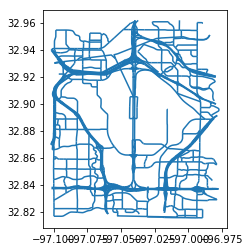

In [30]:
# Display new modified shapefile
save_net_file_dbf.plot()

## Save new file to shapefile

In [31]:
save_net_file_dbf.to_file(driver = 'ESRI Shapefile', filename = 'Data/Bounded_Net/Sumo_Shapefile')

/Users/jseverin/anaconda3/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [33]:
# Save edge ids
f= open("Data/Bounded_Net/edge_ids.txt","w+")

for i in range(len(save_net_file_dbf['LINK_ID'])):
     f.write(str(save_net_file_dbf['LINK_ID'][i])+'\n')
        
f.close()

In [34]:
# Save from node ids
f= open("Data/Bounded_Net/start_node_ids.txt","w+")

from_nodes = list(set(save_net_file_dbf['REF_IN_ID']))

f.write(str(from_nodes[0]))

for i in range(1,len(from_nodes)):
    f.write(','+str(from_nodes[i]))
        
f.close()

In [35]:
# Save to node ids
f= open("Data/Bounded_Net/end_node_ids.txt","w+")

to_nodes = list(set(save_net_file_dbf['NREF_IN_ID']))

f.write(str(to_nodes[0]))
for i in range(1,len(to_nodes)):
     f.write(',' + str(to_nodes))
        
f.close()

In [36]:
# Save traffic light controlled node
sta_ttl_nodes = list(set(save_net_file_dbf.loc[save_net_file_dbf['CNTRLA'] == 2]['REF_IN_ID'].tolist()))
end_ttl_nodes = list(set(save_net_file_dbf.loc[save_net_file_dbf['CNTRLB'] == 2]['NREF_IN_ID'].tolist()))

In [37]:
combined_list = list(set(sta_ttl_nodes).union(set(end_ttl_nodes)))

In [38]:
print(len(combined_list))

212


In [39]:
# Save id of nodes controlled by traffic lights
f= open("Data/Bounded_Net/traffic_node_ids.txt","w+")

f.write(str(combined_list[0]))
for i in range(1,len(combined_list)):
     f.write(','+ str(combined_list[i]))
        
f.close()

In [40]:
# Nodes not controlled by traffic lights
no_ttl = list(set(from_nodes).union(set(to_nodes)) - set(combined_list))
f= open("Data/Bounded_Net/no_traffic_node_ids.txt","w+")

f.write(str(no_ttl[0]))

for i in range(1,len(no_ttl)):
     f.write(','+ str(no_ttl[i]))
        
f.close()

## Sumo command are to be run on command line, in Data/Sumo_shapefile folder. They will need to be updated to run from current folder.

## Conversion to Sumo network: 
### --tls.set specifies nodes with traffic, while --tls.set is specify nodes without traffic lights
```
$SUMO_HOME/bin/netconvert --shapefile-prefix Sumo_Shapefile --shapefile.street-id LINK_ID --shapefile.from-id REF_IN_ID --shapefile.to-id NREF_IN_ID --edges.join t --tls.guess t --tls.set "$(< ../traffic_node_ids.txt)" --tls.unset "$(< ../no_traffic_node_ids.txt)"
```

## Divide the network obtained into different files: node file, edge file, traffic light file and connection file
$SUMO_HOME/bin/netconvert --sumo-net-file net.net.xml --plain-output-prefix dfw --proj.plain-geo

## Read in node file and change type of control at nodes to match the shapefiles

In [46]:
import xml.etree.ElementTree as ET
tree = ET.parse('Data/Bounded_Net/Sumo_Shapefile/dfw.nod.xml')

In [47]:
# 1: no control  -- sumo: unregulated
# 2: traffic signal   -- sumo: traffic_light
# 5: Yield    -- sumo: priority_stop
# 6: all-way stop-controlled     -- sumo: allway_stop
# 7: two-way stop  -- sumo: guessed automatically by sumo

# for i in range(len(root_node)):
i = 0;
for child in tree.iter('node'):
    node_id = int(child.attrib['id'])
    node_type = child.attrib['type']

    entry_of_interest = save_net_file_dbf.loc[save_net_file_dbf['REF_IN_ID'] == node_id]
    if len(entry_of_interest) == 0:
        entry_of_interest = save_net_file_dbf.loc[save_net_file_dbf['NREF_IN_ID'] == node_id]
        type_in_shapefile = entry_of_interest['CNTRLB'].tolist()[0]
    else:
        type_in_shapefile = entry_of_interest['CNTRLA'].tolist()[0]

    
    if type_in_shapefile == 2 and node_type != 'traffic_light':
        print('traffic light conversion did not work, repeat step and check for error')
        child.set('type','traffic_light')
    elif type_in_shapefile == 1 and node_type != 'unregulated':
        child.set('type','unregulated')
    elif type_in_shapefile == 5 and node_type != 'priority':
        child.set('type','priority')
    elif type_in_shapefile == 7 and node_type != 'priority_stop':
        child.set('type','priority_stop')
    elif type_in_shapefile == 6 and node_type != 'allway_stop':
        child.set('type','allway_stop')
    else:
        if type_in_shapefile == 2: i += 1;
    
    #Remove the extra attributes from the tree
    child.attrib.pop('x')
    child.attrib.pop('y')

## Need to check again why some traffic lights are not being set correctly

In [48]:
# Save the new node file
from xml.dom import minidom
new_node_file = 'Data/Bounded_Net/Sumo_Shapefile/corrected_small.nod.xml'
tree.write(new_node_file)

## Modifying the node file type to match the shapefile type from the corrected node xml: new network is after -o
$SUMO_HOME/bin/netconvert -s net.net.xml --node-files corrected_small.nod.xml -o corrected_nodes.net.xml

## Generating trips for 100,000 vehicles
python "$SUMO_HOME/tools/randomTrips.py" -n net.net.xml --seed 42 --fringe-factor 5 -p 0.036 -r dfw.passenger.rou.xml -e 3600 --vehicle-class passenger --vclass passenger --prefix veh --min-distance 300 --trip-attributes 'departLane="best"' --validate

## Running the simulation
$SUMO_HOME/bin/sumo-gui -n net.net.xml -r dfw.passenger.rou.xml